In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
warnings.filterwarnings('ignore')

In [2]:
path = 'C:/Users/camer/OneDrive/Documents/dev/home_research/data/volatility_prediction_optiver/'

In [3]:
book_train_all_stocks = []
for i in range(127):
    try:
        book_train = pd.read_parquet(path + 'book_train.parquet/stock_id=' + str(i))
        book_train['stock_id'] = i
        book_train_all_stocks.append(book_train)
        print('added stock', i)
    except: 
        continue
book_train_all_stocks = pd.concat(book_train_all_stocks)
print('completed_concatenation')
book_train_all_stocks

added stock 0
added stock 1
added stock 2
added stock 3
added stock 4
added stock 5
added stock 6
added stock 7
added stock 8
added stock 9
added stock 10
added stock 11
added stock 13
added stock 14
added stock 15
added stock 16
added stock 17
added stock 18
added stock 19
added stock 20
added stock 21
added stock 22
added stock 23
added stock 26
added stock 27
added stock 28
added stock 29
added stock 30
added stock 31
added stock 32
added stock 33
added stock 34
added stock 35
added stock 36
added stock 37
added stock 38
added stock 39
added stock 40
added stock 41
added stock 42
added stock 43
added stock 44
added stock 46
added stock 47
added stock 48
added stock 50
added stock 51
added stock 52
added stock 53
added stock 55
added stock 56
added stock 58
added stock 59
added stock 60
added stock 61
added stock 62
added stock 63
added stock 64
added stock 66
added stock 67
added stock 68
added stock 69
added stock 70
added stock 72
added stock 73
added stock 74
added stock 75
added

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100,0
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100,0
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0
...,...,...,...,...,...,...,...,...,...,...,...
1042044,32767,588,0.999229,1.000051,0.999177,1.000103,100,200,28,100,126
1042045,32767,589,0.999229,1.000051,0.999177,1.000103,100,200,1,100,126
1042046,32767,590,0.999229,0.999794,0.999177,1.000051,101,27,1,200,126
1042047,32767,592,0.999229,0.999743,0.999177,1.000051,101,11,1,200,126


In [10]:
trade_train_all_stocks = []
for i in range(127):
    try:
        trade_train = pd.read_parquet(path + 'trade_train.parquet/stock_id=' + str(i))
        trade_train['stock_id'] = i
        trade_train_all_stocks.append(trade_train)
        print('added stock', i)
    except: 
        continue
trade_train_all_stocks = pd.concat(trade_train_all_stocks)
print('completed_concatenation')
trade_train_all_stocks.head()

added stock 0
added stock 1
added stock 2
added stock 3
added stock 4
added stock 5
added stock 6
added stock 7
added stock 8
added stock 9
added stock 10
added stock 11
added stock 13
added stock 14
added stock 15
added stock 16
added stock 17
added stock 18
added stock 19
added stock 20
added stock 21
added stock 22
added stock 23
added stock 26
added stock 27
added stock 28
added stock 29
added stock 30
added stock 31
added stock 32
added stock 33
added stock 34
added stock 35
added stock 36
added stock 37
added stock 38
added stock 39
added stock 40
added stock 41
added stock 42
added stock 43
added stock 44
added stock 46
added stock 47
added stock 48
added stock 50
added stock 51
added stock 52
added stock 53
added stock 55
added stock 56
added stock 58
added stock 59
added stock 60
added stock 61
added stock 62
added stock 63
added stock 64
added stock 66
added stock 67
added stock 68
added stock 69
added stock 70
added stock 72
added stock 73
added stock 74
added stock 75
added

,time_id,seconds_in_bucket,price,size,order_count,stock_id
0,5,21,1.002301,326,12,0
1,5,46,1.002778,128,4,0
2,5,50,1.002818,55,1,0
3,5,57,1.003155,121,5,0
4,5,68,1.003646,4,1,0


In [13]:
train_stock0 = pd.merge(book_train_all_stocks[book_train_all_stocks['stock_id']==0], trade_train_all_stocks[trade_train_all_stocks['stock_id']==0], on=['stock_id', 'time_id', 'seconds_in_bucket'], how='outer')
train_stock0.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,price,size,order_count
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,0,NaN,NaN,NaN
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,0,NaN,NaN,NaN
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,0,NaN,NaN,NaN
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0,NaN,NaN,NaN
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0,NaN,NaN,NaN


In [14]:
# get target
train_target = pd.read_csv(path + 'train.csv')
train_target.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [16]:
train_stock0['mid_price'] = (train_stock0['bid_price1'] + train_stock0['ask_price1']) / 2
train_stock0

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,price,size,order_count,mid_price
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100,0,NaN,NaN,NaN,1.001862
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100,0,NaN,NaN,NaN,1.001862
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0,NaN,NaN,NaN,1.001862
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,NaN,NaN,NaN,1.001862
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,NaN,NaN,NaN,1.001862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28,0,NaN,NaN,NaN,0.998515
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28,0,NaN,NaN,NaN,0.998515
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28,0,NaN,NaN,NaN,0.998515
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28,0,NaN,NaN,NaN,0.998515


<Axes: xlabel='time'>

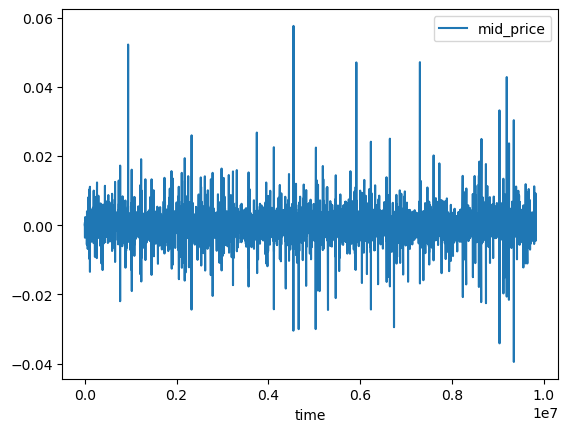

In [17]:
train_stock0['time'] = train_stock0['time_id'].astype(int)*60*5 + train_stock0['seconds_in_bucket']
train_stock0[['time', 'mid_price']].set_index('time').diff().plot()

In [18]:
from helper_functions.afml_functions.afml_modelling_lib import quantile_encode_series, shannon_entropy, encode_and_entropy

In [19]:
train_stock0['encoded_ret'] = quantile_encode_series(train_stock0['mid_price'].diff())

In [39]:
train_stock0['log_ret'] = np.log(train_stock0['mid_price']) - np.log(train_stock0['mid_price'].shift())

In [45]:
import string
ENCODING_CHARS = list(string.printable)


def quantile_encode_series(series: pd.Series, q: int = 10):
    """
    Encodes the series such that it is labelled with each quantile.
    This is currently only supported for q <= 100 (as we encode using characters available in the string module)

    Args:
    encoded_series: series of values, e.g. time series of returns
    q: number of quantiles to be used for encoding

    Returns:
    pd.Series of encoded characters
    """
    return pd.cut(series, bins=q, labels=ENCODING_CHARS[:q]).astype(str)


def shannon_entropy(encoded_series: pd.Series, sequence_length: int):
    """
    Calculates the probability mass function for an encoded series, for sequences of length sequence_length.
    Then calculates the single entropy value for the encoded series.
    This should be used in conjunction with pandas rolling where we seek to find a series of entropy values across
    a rolling window.

    Args:
    encoded_series: series of encoded values, there should be a fixed number of unique encodings, e.g. 2 (binary) or
                    m (m-quantile). Encodings should be chars/strings.
    sequence_length: integer value L for the length of the sequence examined for our pmf. There could be a total of
                        M^L possible sequences (pick L from M distinct possibilities)

    Returns:
    estimated Shannon entropy
    """
    pmf = {}
    # must turn encodings into string
    encoded_series = "".join(encoded_series)
    for i in range(sequence_length, len(encoded_series)):
        sequence = encoded_series[i-sequence_length:i]
        if sequence in pmf:
            pmf[sequence] += 1
        else:
            pmf[sequence] = 1
    num_sequences =len(encoded_series) - sequence_length
    pmf = np.array([pmf[seq]/num_sequences for seq in pmf.keys()])
    return -sum(pmf * np.log2(pmf))

In [46]:
train_stock0['entropy'] = train_stock0[['time_id', 'log_ret']].groupby('time_id').apply(lambda x: shannon_entropy(quantile_encode_series(x['log_ret'], 10).astype(str), 6))

In [47]:
train_stock0['entropy'].dropna()

5        5.691447
11       1.122224
16       5.271069
31       3.272970
62       3.764550
           ...   
32751    3.990129
32753    2.215676
32758    4.947446
32763    6.655197
32767    3.476037
Name: entropy, Length: 3830, dtype: float64

In [49]:
train_target[train_target['stock_id'] == 0]

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
3825,0,32751,0.002611
3826,0,32753,0.001190
3827,0,32758,0.004264
3828,0,32763,0.004352


In [65]:
stock0_entropy_target = pd.DataFrame(train_stock0['entropy'].dropna()).join(train_target[train_target['stock_id'] == 0].set_index('time_id')[['target']])
stock0_entropy_target['last_target'] = stock0_entropy_target['target'].shift()

In [70]:
stock0_entropy_target = stock0_entropy_target.dropna()

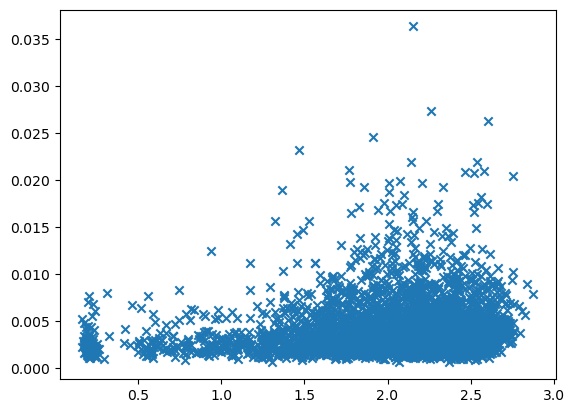

In [60]:
plt.scatter(np.sqrt(stock0_entropy_target['entropy']), stock0_entropy_target['target'], marker='x')

In [74]:
import statsmodels.api as sm
mod = sm.OLS(stock0_entropy_target['target'], stock0_entropy_target[['last_target', 'entropy']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              3514.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):                        0.00
Time:                        22:36:31   Log-Likelihood:                          16898.
No. Observations:                3829   AIC:                                 -3.379e+04
Df Residuals:                    3827   BIC:                                 -3.378e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
last_target     0.2327      0.013     17.780      0.000       0.207       0.258
entropy         0.0007   1.41e-05     48.002      0.000       0.001       0.001
==============================================================================
Omnibus:                     2203.586   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27123.772
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      15.030   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""